###  **Loading and Analysing Real Estate Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Data/Real_Estate.csv')

In [ ]:
data.head()

,money_start,money_goal,period,Real_estate
0,8000,17000,1,6.62
1,6000,10000,1,6.62
2,7000,9000,1,6.62
3,2000,5000,1,6.62
4,9000,11000,1,6.62


In [ ]:
data['Real_estate'] = data['Real_estate']*100

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   money_start  500 non-null    int64  
 1   money_goal   500 non-null    int64  
 2   period       500 non-null    int64  
 3   Real_estate  500 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 15.8 KB


In [ ]:
data['period'] = data['period'].astype(int) ## Converting data type of period to int

### **Feature Engineering**

Including the revelant columns calculated from the existing ones

In [ ]:
import numpy as np

lst1 = []
for j in range(0,len(data)):
    period = data['period'][j]+1

    a = data['money_start'][j]*((1+data['Real_estate'][j]/100)**period)
    lst1 = np.append(lst1,a)

In [ ]:
data['term1'] = lst1

In [ ]:

lst = []
for j in range(0,len(data)):
    period = data['period'][j]+1

    a = sum((1+ data['Real_estate'][j]/100)**(period-i) for i in range(1,period))
    lst = np.append(lst,a)



In [ ]:
data['term2'] = lst

In [ ]:
data.head()

,money_start,money_goal,period,Real_estate,term1,term2
0,8000,17000,1,6.62,9094.25952,1.0662
1,6000,10000,1,6.62,6820.69464,1.0662
2,7000,9000,1,6.62,7957.47708,1.0662
3,2000,5000,1,6.62,2273.56488,1.0662
4,9000,11000,1,6.62,10231.04196,1.0662


In [ ]:
lst2 = []

for j in range(0,len(data)):
    increment = (data['money_goal'][j] - data['term1'][j])/data['term2'][j]

    lst2 = np.append(lst2, increment)


In [ ]:
data['increment'] = lst2

In [ ]:
data.head()

,money_start,money_goal,period,Real_estate,term1,term2,increment
0,8000,17000,1,6.62,9094.25952,1.0662,7414.875708
1,6000,10000,1,6.62,6820.69464,1.0662,2981.903358
2,7000,9000,1,6.62,7957.47708,1.0662,977.793022
3,2000,5000,1,6.62,2273.56488,1.0662,2557.151679
4,9000,11000,1,6.62,10231.04196,1.0662,721.213693


### **Train-Test-Split**  

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
data = data.sample(frac=1)

In [ ]:
### Features and Target column

features = data.drop('increment', axis=1)
target = data['increment']

In [ ]:
### Train Test Split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(features, target, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(350, 6) (75, 6) (75, 6) (350,) (75,) (75,)


In [ ]:
### Standardization

##scaler = StandardScaler()

#train_scaled = pd.DataFrame(
      #scaler.fit_transform(X_train),
      #columns=X_train.columns)

#test_scaled = pd.DataFrame(
      #scaler.transform(X_test),
      #columns=X_test.columns)

#train_val_scaled = pd.DataFrame(
      #scaler.fit_transform(X_val),
      #columns=X_val.columns)

### **Model Building**

In [ ]:
### Neural Networks

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(6,), kernel_initializer='normal'),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='normal'),
    tf.keras.layers.Dense(1, activation='linear',kernel_initializer='normal'),
])

In [ ]:
#from tensorflow.keras.losses import MeanSquaredLogarithmicError

#msle = MeanSquaredLogarithmicError()

model.compile(optimizer='adam',
              loss= 'mae',
             metrics = ['mae'])

In [ ]:
hist = model.fit(X_train.values, Y_train.values,
          batch_size=32, epochs=500,
          validation_data=(X_val.values, Y_val.values))

Epoch 1/500
11/11 [==============================] - 1s 16ms/step - loss: 973.5068 - mae: 973.5068 - val_loss: 1168.9388 - val_mae: 1168.9388
Epoch 2/500
11/11 [==============================] - 0s 4ms/step - loss: 802.3203 - mae: 802.3203 - val_loss: 936.6678 - val_mae: 936.6678
Epoch 3/500
11/11 [==============================] - 0s 5ms/step - loss: 646.8301 - mae: 646.8301 - val_loss: 852.7772 - val_mae: 852.7772
Epoch 4/500
11/11 [==============================] - 0s 4ms/step - loss: 599.7867 - mae: 599.7867 - val_loss: 797.2239 - val_mae: 797.2239
Epoch 5/500
11/11 [==============================] - 0s 3ms/step - loss: 553.2979 - mae: 553.2979 - val_loss: 741.3206 - val_mae: 741.3206
Epoch 6/500
11/11 [==============================] - 0s 3ms/step - loss: 549.3516 - mae: 549.3516 - val_loss: 696.3378 - val_mae: 696.3378
Epoch 7/500
11/11 [==============================] - 0s 5ms/step - loss: 533.8719 - mae: 533.8719 - val_loss: 688.6269 - val_mae: 688.6269
Epoch 8/500
11/11 [=====

**Plotting the Model Loss**  

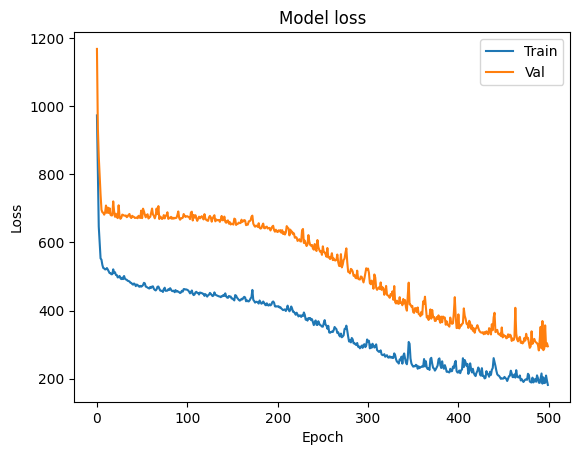

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#### **Decision tree and Random Forest Regressor**  

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
tree_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()

In [ ]:
tree_model.fit(X_train.values, Y_train.values)
rf_model.fit(X_train.values, Y_train.values)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error

score_tree = mean_absolute_error(Y_test, tree_model.predict(X_test)) ##Calculating the mean absolute error Decision tree model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [ ]:
score_rf = mean_absolute_error(Y_test, rf_model.predict(X_test)) ##Calculating the mean absolute error Random Forest model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
score_nn = mean_absolute_error(Y_test, model.predict(X_test))  ##Calculating the mean absolute error Neural Network model

3/3 [==============================] - 0s 3ms/step


Printing the mean absolute error scores for the above trained models

In [ ]:
print(score_tree)
print(score_rf)
print(score_nn)

246.21994110877156
211.91818271171317
320.62013332747546


We can say that Random Forest performed well in this case

**Save the model file**  

In [ ]:
import pickle

pickle.dump(rf_model, open('rf_model_RS.pkl', 'wb'))